# 2.7 Однослойные модели


## В этом уроке собраны упражнения по программированию для второй недели.

Сперва вам необходимо скачать задания. У вас есть два варианта:

    Скачать удобный Jupyter notebook (далее «ноутбук», кто придумает лучше — пишите в комментарии) с картинками, легко читаемыми пояснениями и дополнительными интерактивными визуализациями, которые будут начинать работать по мере выполнения заданий.
    Посмотреть на ноутбук из первого пункта в браузере: картинки, пояснения, одна визуализация, но никакой интерактивности и никаких анимаций.
Проблема с ноутбуком только одна — вы можете не знать, что это и как этим пользоваться. Хорошая новость заключается в том, что «учиться» пользоваться jupyter notebook вам сейчас не нужно. Им нужно просто пользоваться =) 
Ладно, две проблемы: ещё у вас может не быть установлен пакет, которым мы пользовались для построения графиков, matplotlib. Это решается легко: conda install matplotlib, pip3 install matplotlib или что-то аналогичное в зависимости от конфигурации вашей системы.

Jupyter notebook — это браузерное приложение, которое вы запускаете на своём компьютере. Вы получаете возможность у себя в браузере читать/писать текст с разметкой (Markdown) и формулами (MathJax, примерно такие же, как на Степике, только не настолько глючные =) ). Но главное — вы можете писать и выполнять код (с подсветкой синтаксиса и подсказками) на Python (и ещё на более чем 40 языках, по словам сайта проекта). Это действительно удобно и много где используется, очень рекомендуем попробовать. 

Весь наш ноутбук состоит из ячеек двух типов: ячейки с кодом и ячейки с текстом. Выполнить ячейку с кодом можно, выделив её и нажав на кнопку play (или Shift+Enter). Чтобы добавить ячейку, выделите какую-нибудь из имеющихся и нажмите B (добавить снизу) или A (сверху). Чтобы удалить — дважды нажмите D. Сменить тип ячейки: Y — на ячейку с кодом,  M — на ячейку с текстом. Чтобы поменять что-то внутри ячейки — нажмите на неё дважды, чтобы войти в режим редактирования. Чтобы выйти из режима редактирования содержания ячейки — нажмите Esc. Интерфейс очень интуитивный и все то же самое можно делать, кликая мышкой по иконкам.

Как установить: conda install jupyter, pip3 install jupyter или что-то аналогичное в зависимости от конфигурации вашей системы. Как запустить: открываете терминал там, где лежит скачанным наш ноутбук, пишете jupyter notebook, жмёте Enter, в вашем браузере открывается список файлов, нажимаете на наш ноутбук и погружаетесь (если слово «терминал» вас пугает - может сработать двойной клик =) ).

Чтобы получить все интерактивные визуализации, вам надо не забывать запускать все клетки с кодом, в которых содержится их описание. Для тех, кто с этим справится, есть отдельное задание на 8 баллов.

Альтернатива - можно весь код перенести в обычный Python скрипт, с минимальными исправлениями всё должно работать. Бонусы: можно крутить графики, которые в ноутбуке статичны. Минусы: что-то может сломаться.

Итак, ссылки:

    статически отрисованная версия ноутбука,
https://nbviewer.jupyter.org/github/stacymiller/stepic_neural_networks_public/blob/master/HW_1/Hw_1_student_version.ipynb
    
    репозиторий на GitHub с ноутбуком, данными и картинками.
https://github.com/stacymiller/stepic_neural_networks_public
    
Задания сформулированы в ноутбуке. Сдавать ваши функции необходимо в соответствующих степах этого урока.

Как и во всём курсе, в ноутбуке код написан на Python3. Небольшие изменения для Python2 предложил @Akarazeev: описание, diff, patch.

Удачи ;)

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # начальное состояние генератора случайных чисел, чтобы можно было воспроизводить результаты.

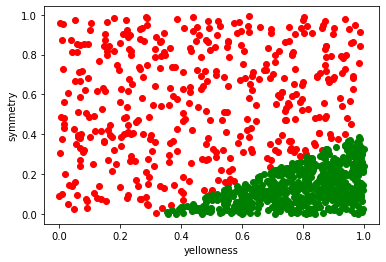

In [2]:
%matplotlib inline
data = np.loadtxt("data.csv", delimiter=",")
pears = data[:, 2] == 1
apples = np.logical_not(pears)
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

# Задание

## Реализуйте метод vectorized_forward_pass класса Perceptron. 

Когда вы начнёте решать задачу, вам нужно будет просто скопировать соответствующую функцию, которую вы написали в ноутбуке (без учёта отступов; шаблон в поле ввода ответа уже будет, ориентируйтесь по нему). Сигнатура функции указана в ноутбуке, она остаётся неизменной.

n — количество примеров, m — количество входов. Размерность входных данных input_matrix — (n, m), размерность вектора весов — (m, 1), смещение (bias) — отдельно. vectorized_forward_pass должен возвращать массив формы (n, 1), состоящий либо из 0 и 1, либо из True и False.

Обратите внимание, необходимо векторизованное решение, то есть без циклов и операторов ветвления. Используйте свойства умножения матриц и возможность эффективно применять какую-нибудь операцию к каждому элементу np.array, чтобы с минимумом кода получить желаемый результат. Например, 

In [3]:
my_vec = np.array([-1, 2, 3]) 
is_positive = my_vec > 0
is_positive

# array([False,  True,  True], dtype=bool)

array([False,  True,  True])

In [ ]:
import numpy as np

def vectorized_forward_pass(self, input_matrix):        
    z = (input_matrix @ self.w) + self.b
    return z>0

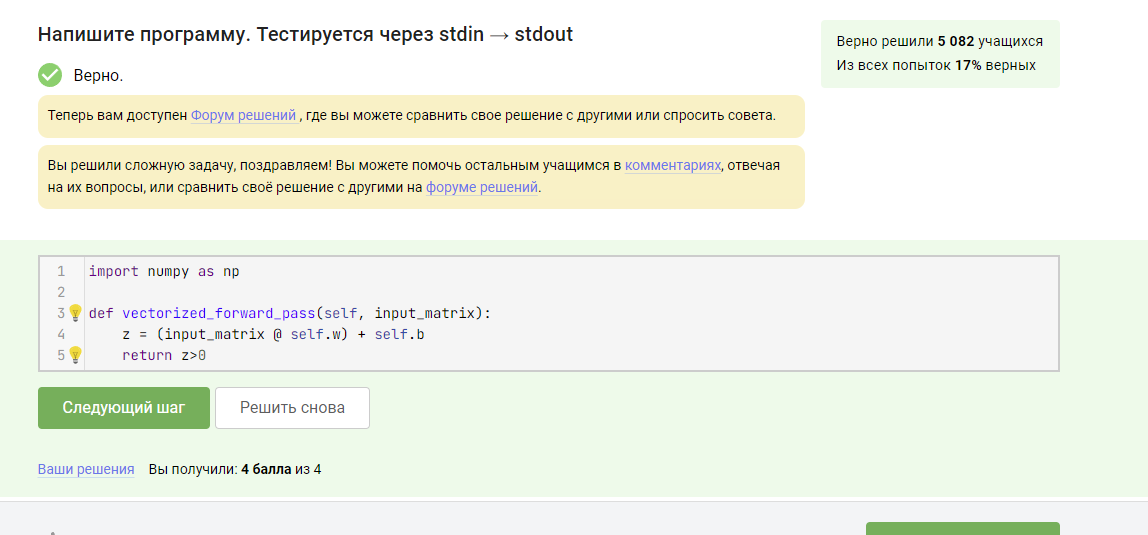

In [ ]:
import numpy as np

def vectorized_forward_pass(self, input_matrix):        
   return (input_matrix.dot(self.w) + self.b) > 0


# Задание

В данном степе вам нужно реализовать метод **train_on_single_example** класса Perceptron, который получает на вход один набор входных активаций размерности (m,1) и правильный ответ (число 0 или 1), после чего обновляет веса в соответствии с правилом обучения перцептрона. Когда вы начнёте решать задачу, вам нужно будет просто скопировать соответствующую функцию, которую вы написали в ноутбуке (без учёта отступов; шаблон в поле ввода ответа уже будет, ориентируйтесь по нему). Сигнатура функции указана в ноутбуке, она остаётся неизменной.

Обязательно проверяйте размерности на соответствие указанным в задании и в сигнатуре функции!

Дополнительное ограничение: в данной функции нельзя использовать операторы ветвления и циклы. Мы не сможем это проверить во всех случаях (но, возможно, ваше решение с циклом не сможет уложиться в отведённый решению период работы), так что ответственность за выполнение этого ограничения ложится на вашу совесть.

In [ ]:
import numpy as np

def train_on_single_example(self, example, y):
    # your code goes here
    predict = self.w.T@example+self.b > 0
    error = y-predict
    self.w = self.w + error*example
    self.b = self.b + error
    return error


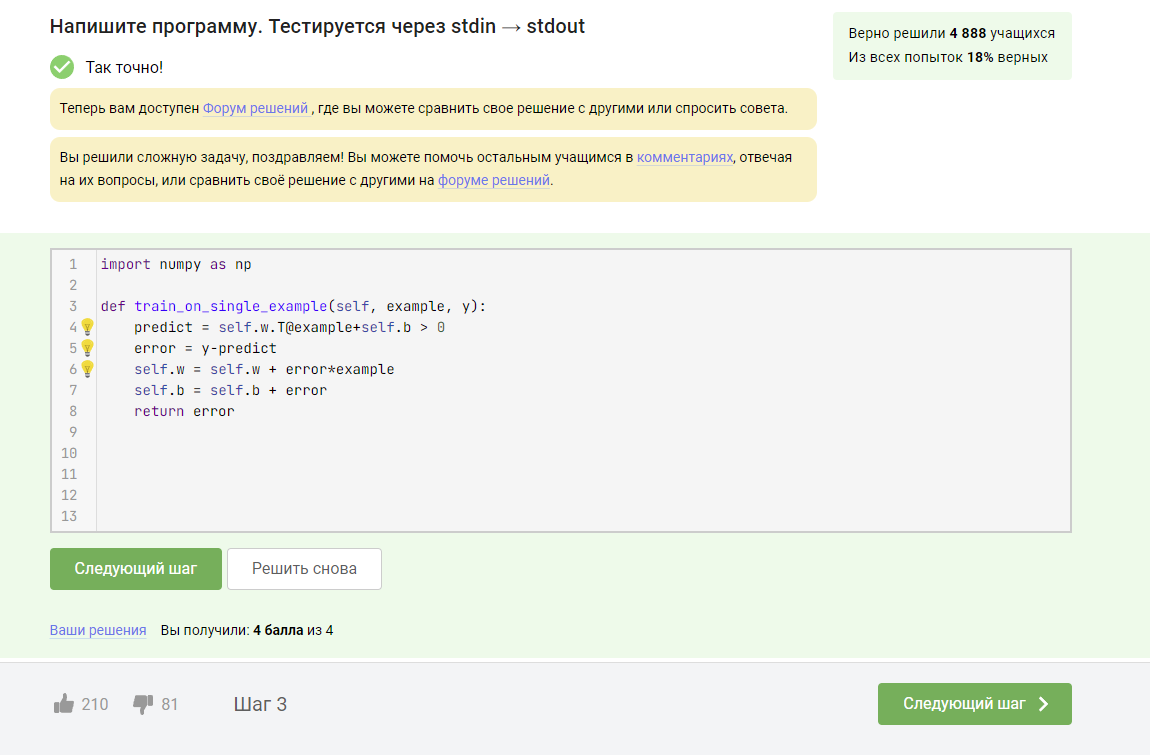

# ПОТОМ ПРОВЕРИТЬ .. МОЖЕТ ABS(error) ? нужен

In [ ]:
import numpy as np

def train_on_single_example(self, example, y):
        err = y - self.forward_pass(example)
        self.w+=err*example
        self.b+=err
        return err



In [ ]:
import numpy as np

def train_on_single_example(self, example, y):
        predict = self.vectorized_forward_pass(example.T)[0][0]
        self.w += example*(y - predict)
        self.b += y - predict
        return y - predict

In [ ]:
import numpy as np

def train_on_single_example(self, example, y):
    # your code goes here
    error = y - self.vectorized_forward_pass(example.T)
    self.w += error * example
    self.b += error
    return error   


# Задание

Реализуйте методы activation и summatory класса Neuron. 

Когда вы начнёте решать задачу, вам нужно будет просто скопировать соответствующую функцию, которую вы написали в ноутбуке (без учёта отступов; шаблон в поле ввода ответа уже будет, ориентируйтесь по нему). Сигнатура функции указана в ноутбуке, она остаётся неизменной.

n — количество примеров, m — количество входов. Размерность входных данных input_matrix — (n, m), размерность вектора весов — (m, 1). vectorized_forward_pass должен возвращать массив формы (n, 1), состоящий из чисел (float). Мы будем проверять именно правильность ответа, который возвращает vectorized_forward_pass.

In [ ]:
import numpy as np

def summatory(self, input_matrix):
    self.summatory_activation = input_matrix @ self.w
    return self.summatory_activation

def activation(self, summatory_activation):
    return self.activation_function(summatory_activation)

def vectorized_forward_pass(self, input_matrix):
    return self.activation(self.summatory(input_matrix))

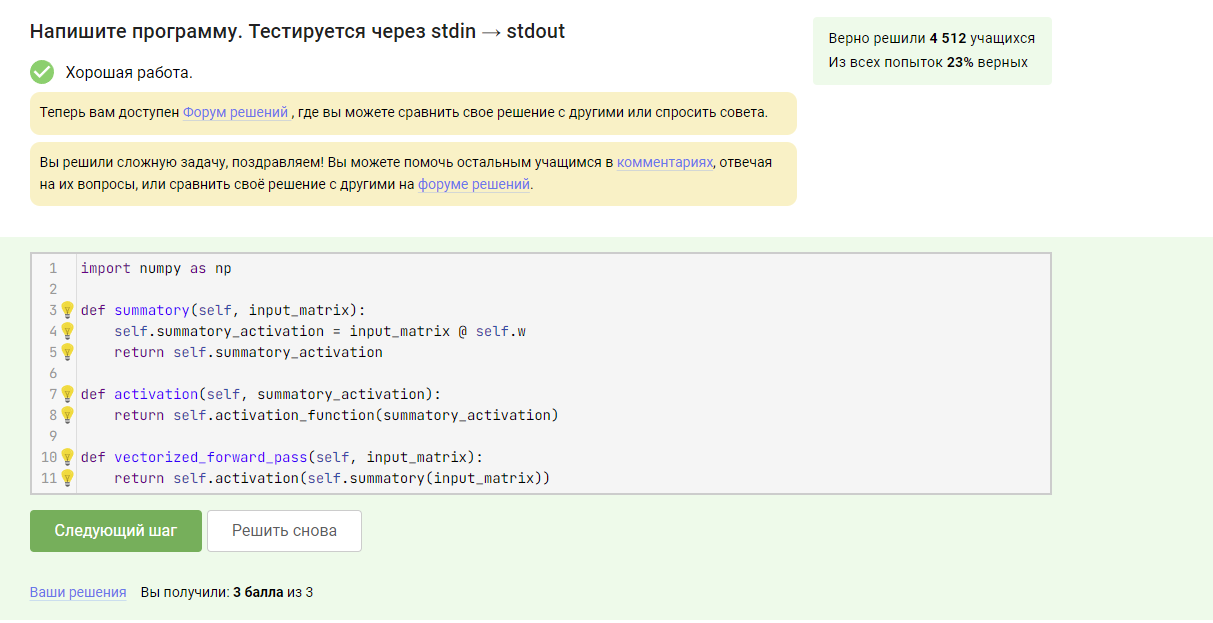

In [ ]:
import numpy as np

def summatory(self, input_matrix):
    return np.dot(input_matrix, self.w)

def activation(self, summatory_activation):
    return self.activation_function(summatory_activation)

def vectorized_forward_pass(self, input_matrix):
    return self.activation(self.summatory(input_matrix))

In [ ]:
import numpy as np

def summatory(self, input_matrix):
    return input_matrix.dot(self.w)

def activation(self, summatory_activation):
    return 1/(1 + np.exp(-summatory_activation))

def vectorized_forward_pass(self, input_matrix):
    return self.activation(self.summatory(input_matrix))

In [ ]:
import numpy as np

def summatory(self, input_matrix):
    return input_matrix.dot(self.w)

def activation(self, summatory_activation):
    return sigmoid(summatory_activation)

def vectorized_forward_pass(self, input_matrix):
    return self.activation(self.summatory(input_matrix))

## Задача для самопроверки (то есть за неё не даются баллы).

Реализуйте метод update_mini_batch класса Neuron. Когда вы решите сдать задачу, вам нужно будет просто скопировать соответствующие функции (которые вы написали в ноутбуке ) сюда. Копируем без учёта отступов; шаблон в поле ввода ответа уже будет, ориентируйтесь по нему. Сигнатура функции указана в ноутбуке, она остаётся неизменной.

update_mini_batch считает градиент и обновляет веса нейрона на основе всей переданной ему порции данных, кроме того, возвращает 1, если алгоритм сошелся (абсолютное значение изменения целевой функции до и после обновления весов < eps), иначе возвращает 0.

Мы будем проверять ваш алгоритм на данных разного размера. Пример данных, на которых вы можете проверить работу своего решения самостоятельно:

In [ ]:
np.random.seed(42)
n = 10
m = 5

X = 20 * np.random.sample((n, m)) - 10
y = (np.random.random(n) < 0.5).astype(np.int)[:, np.newaxis]
w = 2 * np.random.random((m, 1)) - 1

neuron = Neuron(w)
neuron.update_mini_batch(X, y, 0.1, 1e-5)

Если вы посмотрите на веса нейрона neuron после выполнения этого кода, то они должны быть такими:
    
    >>> print(neuron.w)
[[-0.22368982]
 [-0.45599204]
 [ 0.65727411]
 [-0.28380677]
 [-0.43011026]]

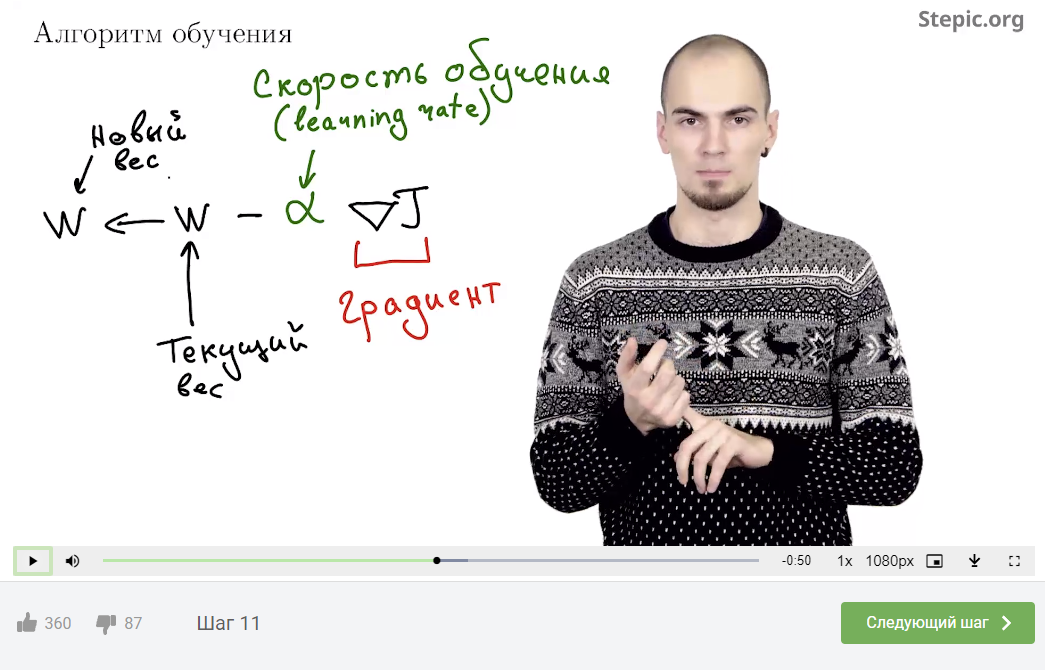

    Вычисляем текущее значение целевой функции;
    
    Вычисляем градиент;
    
    Корректируем веса;
    
    Вычисляем новое значение целевой функции;
    
    Вычисляем абсолютное значение разницы значений целевой функции после и до корректировки весов;
    
Сравниваем последнее с критерием остановки и преобразовываем в целочисленную переменную. Не забываем про return.
Кажется что пунктов много, но если не плодить промежуточные переменные и "дружить с Зюком", то получается 3 строки кода. Я к тому, что все проще чем может показаться. Удачи и сосредоточенности!

OMG! Я проходил этот пример в течении двух недель потом все бросил на полгода из-за него, и сейчас за 2 дня сделал. Обожаю этот курс!
Для всех, кто уже задолбался:

    1. у нас есть compute_grad_analytically который сам вычисляет градиет

    2. у нас есть J_quadratic - это и есть целевая функция

    3. из весов мы вычитаем

    4. из до вычитается после

    5. аргумент neuron может быть self

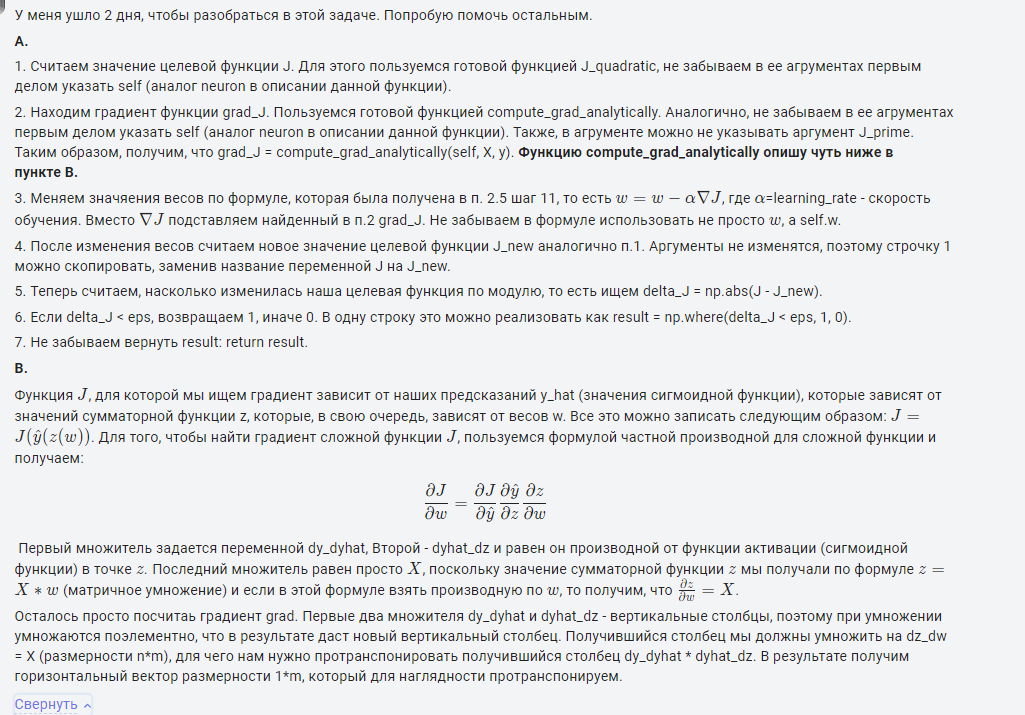

In [ ]:
import numpy as np

def update_mini_batch(self, X, y, learning_rate, eps):
    J = J_quadratic(self, X, y)
    gr = compute_grad_analytically(self, X, y)
    self.w = self.w - learning_rate*gr
    J2 = J_quadratic(self, X, y)
    delta_J = abs(J - J2)
    result = np.where(delta_J < eps, 1, 0)
    return result
    # here goes your code



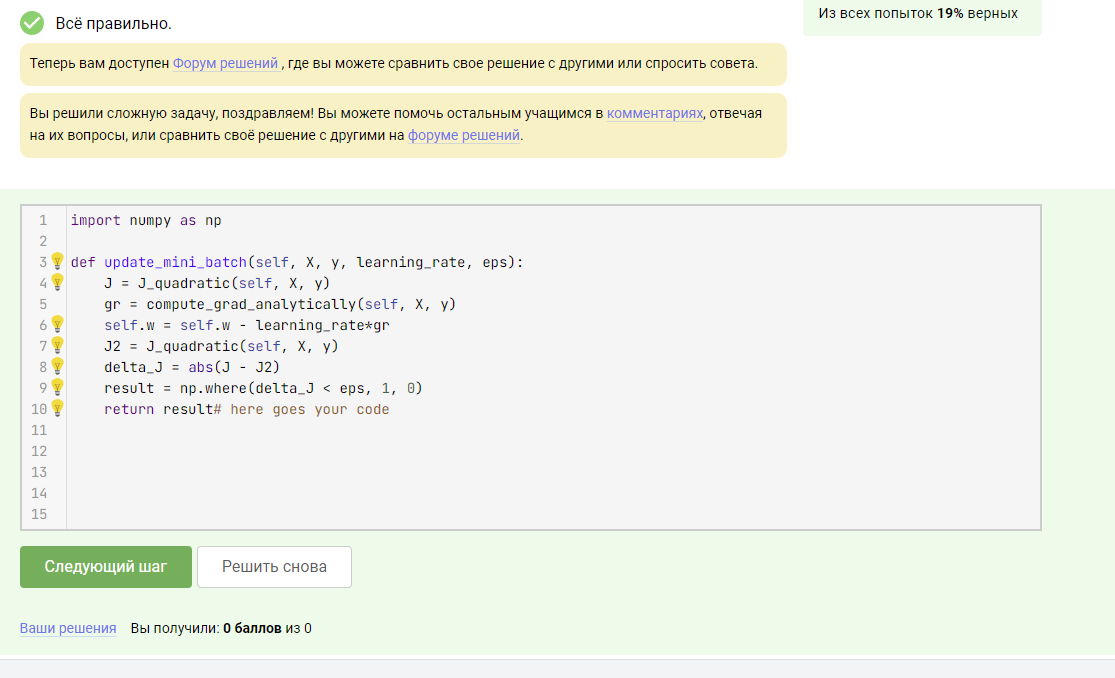

In [ ]:
import numpy as np

def update_mini_batch(self, X, y, learning_rate, eps):
    u1 = J_quadratic(self, X, y)
    self.w -= learning_rate * compute_grad_analytically(self, X, y)
    return u1 - J_quadratic(self, X, y) < eps

In [ ]:
import numpy as np

def update_mini_batch(self, X, y, learning_rate, eps):
    y_ = self.vectorized_forward_pass(X)
    n = y.shape[0]
    target_before = ((y - y_)**2).sum() / 2 / n
    grad = X.T.dot((y_ - y) * y_ * (1 - y_)) / n
    self.w -= learning_rate * grad
    target_after = ((y - self.vectorized_forward_pass(X))**2).sum() / 2 / n
    return np.absolute(target_before-target_after) < eps

In [ ]:
import numpy as np

def update_mini_batch(self, X, y, learning_rate, eps):
    y_ = sigmoid(X.dot(self.w))
    J1 = (1/(2*len(y))) * (((y_ - y).T).dot(y_ - y))
    g = (X.T).dot(((y_ - y) / len(y)) * (y_*(1-y_)))
    self.w = self.w - learning_rate*g
    y_ = sigmoid(X.dot(self.w))
    J2 = (1/(2*len(y))) * (((y_ - y).T).dot(y_ - y))

    return (abs(J1 - J2 < eps))

In [ ]:
import numpy as np

def update_mini_batch(self, X, y, learning_rate, eps):
        #Оцениваем значение целевой функции
        J_old = J_quadratic(self,X,y)
        #Вычисляем градиент
        grad_J = compute_grad_analytically(self, X, y) 
        #Обновляем веса и пересчитываем значение целевой функции
        self.w -= learning_rate * grad_J
        J_new = J_quadratic(self,X,y)
        
        #Если измененеие целевой функции не больше eps вернуть 1, иначе 0      
        if np.abs(J_old - J_new) < eps:
            return 1
        else:
            return 0

In [ ]:
import numpy as np

def update_mini_batch(self, X, y, learning_rate, eps):
    # Вычисляем текущее значение целевой функции
    j = 0.5 * np.mean((self.vectorized_forward_pass(X) - y) ** 2)
    y_hat = self.vectorized_forward_pass(X)

    # Вычисляем нужные нам частные производные
    dy_dyhat = (y_hat - y) / len(y) 
    z = self.summatory(X)
    dyhat_dz = self.activation_function_derivative(z)
    dz_dw = X

    # Вычисляем градиент
    grad = ((dy_dyhat * dyhat_dz).T).dot(dz_dw)
    grad = grad.T

    # Изменим веса с learning_rate
    self.w -= learning_rate * grad

    # Пересчитываем  целевую функцию с новыми ввесами
    j_new = 0.5 * np.mean((self.vectorized_forward_pass(X) - y) ** 2)

    #Смотрим как изменилась функция
    delta = np.abs(j - j_new)

    # Сравниваем с критерием остановки и возвращаем результат
    result = 1 if delta <= eps else 0

    return result

## и что мы сотворили

In [6]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # начальное состояние генератора случайных чисел, чтобы можно было воспроизводить результаты.

In [10]:
def J_quadratic(neuron, X, y):
    """
    Оценивает значение квадратичной целевой функции.
    Всё как в лекции, никаких хитростей.

    neuron - нейрон, у которого есть метод vectorized_forward_pass, предсказывающий значения на выборке X
    X - матрица входных активаций (n, m)
    y - вектор правильных ответов (n, 1)
        
    Возвращает значение J (число)
    """
    
    assert y.shape[1] == 1, 'Incorrect y shape'
    
    return 0.5 * np.mean((neuron.vectorized_forward_pass(X) - y) ** 2)

def J_quadratic_derivative(y, y_hat):
    """
    Вычисляет вектор частных производных целевой функции по каждому из предсказаний.
    y_hat - вертикальный вектор предсказаний,
    y - вертикальный вектор правильных ответов,
    
    В данном случае функция смехотворно простая, но если мы захотим поэкспериментировать 
    с целевыми функциями - полезно вынести эти вычисления в отдельный этап.
    
    Возвращает вектор значений производной целевой функции для каждого примера отдельно.
    """
    
    assert y_hat.shape == y.shape and y_hat.shape[1] == 1, 'Incorrect shapes'
    
    return (y_hat - y) / len(y)
    
def compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative):
    """
    Аналитическая производная целевой функции
    neuron - объект класса Neuron
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений
    y - правильные ответы для примеров из матрицы X
    J_prime - функция, считающая производные целевой функции по ответам
    
    Возвращает вектор размера (m, 1)
    """
    
    # Вычисляем активации
    # z - вектор результатов сумматорной функции нейрона на разных примерах
    
    z = neuron.summatory(X)
    y_hat = neuron.activation(z)

    # Вычисляем нужные нам частные производные
    dy_dyhat = J_prime(y, y_hat)
    dyhat_dz = neuron.activation_function_derivative(z)
    
    # осознайте эту строчку:
    dz_dw = X

    # а главное, эту:
    grad = ((dy_dyhat * dyhat_dz).T).dot(dz_dw)
    
    # можно было написать в два этапа. Осознайте, почему получается одно и то же
    # grad_matrix = dy_dyhat * dyhat_dz * dz_dw
    # grad = np.sum(, axis=0)
    
    # Сделаем из горизонтального вектора вертикальный
    grad = grad.T
    
    return grad

In [7]:
def sigmoid(x):
    """сигмоидальная функция, работает и с числами, и с векторами (поэлементно)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """производная сигмоидальной функции, работает и с числами, и с векторами (поэлементно)"""
    return sigmoid(x) * (1 - sigmoid(x))

In [11]:
# проверим что блин наваяли

class Neuron:
    
    def __init__(self, weights, activation_function=sigmoid, activation_function_derivative=sigmoid_prime):
        """
        weights - вертикальный вектор весов нейрона формы (m, 1), weights[0][0] - смещение
        activation_function - активационная функция нейрона, сигмоидальная функция по умолчанию
        activation_function_derivative - производная активационной функции нейрона
        """
        
        assert weights.shape[1] == 1, "Incorrect weight shape"
        
        self.w = weights
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward_pass(self, single_input):
        """
        активационная функция логистического нейрона
        single_input - вектор входов формы (m, 1), 
        первый элемент вектора single_input - единица (если вы хотите учитывать смещение)
        """
        
        result = 0
        for i in range(self.w.size):
            result += float(self.w[i] * single_input[i])
        return self.activation_function(result)
    
    def summatory(self, input_matrix):
        """
        Вычисляет результат сумматорной функции для каждого примера из input_matrix. 
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вектор значений сумматорной функции размера (n, 1).
        """
        # Этот метод необходимо реализовать
        self.summatory_activation = input_matrix @ self.w
        return self.summatory_activation
#         pass
    
    def activation(self, summatory_activation):
        """
        Вычисляет для каждого примера результат активационной функции,
        получив на вход вектор значений сумматорной функций
        summatory_activation - вектор размера (n, 1), 
        где summatory_activation[i] - значение суммматорной функции для i-го примера.
        Возвращает вектор размера (n, 1), содержащий в i-й строке 
        значение активационной функции для i-го примера.
        """
        # Этот метод необходимо реализовать
        return self.activation_function(summatory_activation)
#         pass
    
    def vectorized_forward_pass(self, input_matrix):
        """
        Векторизованная активационная функция логистического нейрона.
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вертикальный вектор размера (n, 1) с выходными активациями нейрона
        (элементы вектора - float)
        """
        return self.activation(self.summatory(input_matrix))
        
    def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
        """
        Внешний цикл алгоритма градиентного спуска.
        X - матрица входных активаций (n, m)
        y - вектор правильных ответов (n, 1)
        
        learning_rate - константа скорости обучения
        batch_size - размер батча, на основании которого 
        рассчитывается градиент и совершается один шаг алгоритма
        
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        Вторым вариантом была бы проверка размера градиента, а не изменение функции,
        что будет работать лучше - неочевидно. В заданиях используйте первый подход.
        
        max_steps - критерий остановки номер два: если количество обновлений весов 
        достигло max_steps, то алгоритм останавливается
        
        Метод возвращает 1, если отработал первый критерий остановки (спуск сошёлся) 
        и 0, если второй (спуск не достиг минимума за отведённое время).
        """
        
        # Этот метод необходимо реализовать
        
        pass
    
    def update_mini_batch(self, X, y, learning_rate, eps):
        """
        X - матрица размера (batch_size, m)
        y - вектор правильных ответов размера (batch_size, 1)
        learning_rate - константа скорости обучения
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        
        Рассчитывает градиент (не забывайте использовать подготовленные заранее внешние функции) 
        и обновляет веса нейрона. Если ошибка изменилась меньше, чем на eps - возвращаем 1, 
        иначе возвращаем 0.
        """
        J = J_quadratic(self, X, y)
        gr = compute_grad_analytically(self, X, y)
        self.w = self.w - learning_rate*gr
        J2 = J_quadratic(self, X, y)
        delta_J = abs(J - J2)
        result = np.where(delta_J < eps, 1, 0)
        return result
    # Этот метод необходимо реализовать
        
        

In [12]:
np.random.seed(42)
n = 10
m = 5

X = 20 * np.random.sample((n, m)) - 10
y = (np.random.random(n) < 0.5).astype(np.int)[:, np.newaxis]
w = 2 * np.random.random((m, 1)) - 1

neuron = Neuron(w)
neuron.update_mini_batch(X, y, 0.1, 1e-5)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array(0)

In [14]:
neuron.w

array([[-0.22368982],
       [-0.45599204],
       [ 0.65727411],
       [-0.28380677],
       [-0.43011026]])

# Задача еще

Реализуйте стохастический градиентный спуск, то есть методы SGD (stochastic gradient descent) и update_mini_batch класса Neuron. Когда вы решите сдать задачу, вам нужно будет просто скопировать соответствующие функции (которые вы написали в ноутбуке ) сюда. Копируем без учёта отступов; шаблон в поле ввода ответа уже будет, ориентируйтесь по нему. Сигнатура функции указана в ноутбуке, она остаётся неизменной.

Задание получилось очень сложным, особенно для тех, у кого мало опыта программирования. Внимательно читайте комментарии в предоставленном коде, чтобы понять, что требуется от ваших функций. Главное - не спешите при написании кода, это приводит к обидным ошибкам и огромным временным затратам.

SGD реализует основной цикл алгоритма. Должен возвращать 1, если градиентный спуск сошёлся, и 0 — если максимальное число итераций было достигнуто раньше, чем изменения в целевой функции стали достаточно малы. 

update_mini_batch считает градиент и обновляет веса нейрона на основе всей переданной ему порции данных, кроме того, возвращает 1, если алгоритм сошелся (абсолютное значение изменения целевой функции до и после обновления весов \lt< eps), иначе возвращает 0.

Необходимые внешние методы (compute_grad_analytically, J_quadratic) уже определены чуть ниже класса Neuron.

Вам могут быть полезны такие функции, как:

np.arange - создать последовательность (хотя можно обойтись и просто list(range( ... )))

np.random.shuffle - перемешать последовательность

np.random.choice - случайным образом выбрать нужное количество элементов из последовательности

Если чувствуете, что решение получается громоздким (функция SGD занимает сильно больше 10 строчек) - можно повторить урок по numpy. По крайней мере, не забывайте, что если X это матрица (np.array со shape = (n, m)), а idx = [1, 5, 3], то X[idx] вернёт вам новую матрицу с тремя соответствующими строчками из X. Кроме того, X[3:5] вернёт вам строки c индексами 3 и 4 (не забывайте, что у нас есть еще нулевая строка). Обратите внимание, что если вы при такой индексации выйдете за границы массива - ошибки не будет, вернётся пустой или неполный (по сравнению с тем, что вы ожидали) набор строк.

Наиболее частые ошибки:

Неправильное формирование батча. Батч должен формироваться заново перед каждым вызовом update_mini_batch. 

Неправильная проверка условия выхода из цикла (превышения количества допустимых вызовов update_mini_batch )

Неправильная проверка условия схождения алгоритма в update_mini_batch

Самостоятельное переписывание (вместо переиспользования) предоставленных функций/методов

Отсутствие self. перед обращением к атрибутам / методам класса

Ошибки по невнимательности (впечатляющее разнообразие, в том числе: выходы за границы массива, формирование батча только по X, независимое перемешивание X и y, путаница с размерностями и индексацией, и многое другое ... )

P.S.

Если очень долго не найти ошибку - напишите псевдокод на бумажке, перепишите функцию "с нуля". Может оказаться быстрее чем выискивать какую-нибудь коварную мелочь. Читайте комментарии, там очень много полезного. Иногда, в конце концов, полезно отвлечься, ключевая идея может совершенно неожиданно прийти "за чашечкой чая". Главное - не отчаивайтесь, удачи!

In [ ]:
import numpy as np

def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
     """
        Внешний цикл алгоритма градиентного спуска.
        X - матрица входных активаций (n, m)
        y - вектор правильных ответов (n, 1)
        
        learning_rate - константа скорости обучения
        batch_size - размер батча, на основании которого 
        рассчитывается градиент и совершается один шаг алгоритма
        
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        Вторым вариантом была бы проверка размера градиента, а не изменение функции,
        что будет работать лучше - неочевидно. В заданиях используйте первый подход.
        
        max_steps - критерий остановки номер два: если количество обновлений весов 
        достигло max_steps, то алгоритм останавливается
        
        Метод возвращает 1, если отработал первый критерий остановки (спуск сошёлся) 
        и 0, если второй (спуск не достиг минимума за отведённое время).
        """
    count = 0
    res = 0
    xcom = np.column_stack((X, y))
    while (count < max_steps):
        np.random.shuffle(xcom)
        samplex = xcom[0:batch_size, : -1]
        sampley = np.array(list([el[-1]] for el in xcom[0:batch_size]))
        res = self.update_mini_batch(samplex,sampley,learning_rate,eps)
        if res:
            return 1
        count += 1
    return res# here goes your code

def update_mini_batch(self, X, y, learning_rate, eps):
    J = J_quadratic(self, X, y)
    gr = compute_grad_analytically(self, X, y)
    self.w = self.w - learning_rate*gr
    J2 = J_quadratic(self, X, y)
    delta_J = abs(J - J2)
    result = np.where(delta_J < eps, 1, 0)
    return result

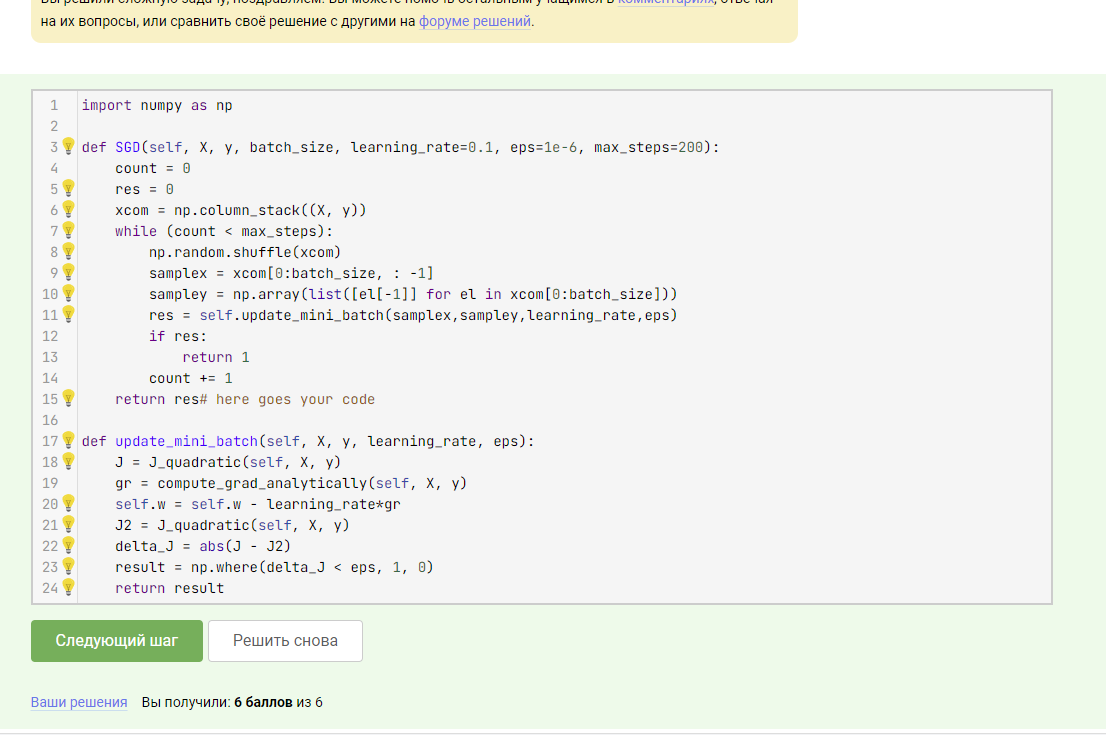

In [ ]:
import numpy as np

def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
    steps = 0
    while steps < max_steps:
        steps += 1
        batch = np.random.choice(np.arange(X.shape[0]), batch_size, False)
        if self.update_mini_batch(X[batch], y[batch], learning_rate, eps):
            return 1
    return 0

def update_mini_batch(self, X, y, learning_rate, eps):
    J = J_quadratic(self, X, y)
    grad = compute_grad_analytically(self, X, y)
    self.w -= learning_rate * grad
    return np.abs(J - J_quadratic(self, X, y)) < eps

In [ ]:
import numpy as np

def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
    current_step = 0
    while current_step < max_steps:
        current_step += 1
        batch = np.random.choice(len(X), batch_size, replace = False)
        if self.update_mini_batch(X[batch], y[batch], learning_rate, eps) == 1: 
            return 1
    return 0

def update_mini_batch(self, X, y, learning_rate, eps):
    before = J_quadratic(self, X, y)
        
    self.w -= learning_rate * compute_grad_analytically(self,X,y)
        
    return np.abs(before-J_quadratic(self, X, y)) < eps

In [ ]:
import numpy as np

def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
    np.random.seed(42)
    for i in range(max_steps):
        rand = np.random.choice(X.shape[0], batch_size, replace = False)
        if update_mini_batch(self, X[rand], y[rand], learning_rate, eps):
            return 1
    return 0

def update_mini_batch(self, X, y, learning_rate, eps):
    prev = J_quadratic(self, X, y)
    self.w -= compute_grad_analytically(self, X, y) * learning_rate
    return prev - J_quadratic(self, X, y) < eps

In [ ]:
import numpy as np

def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
    idxs = list(range(X.shape[0]))
    while max_steps > 0:
        examples = np.random.choice(idxs, size=batch_size, replace=False)
        if self.update_mini_batch(X[examples], y[examples], learning_rate, eps):
            return 1
        max_steps -= 1
    return 0

def update_mini_batch(self, X, y, learning_rate, eps):
    j0 = J_quadratic(self, X, y)
    self.w -= learning_rate * compute_grad_analytically(self, X, y)
    return j0 - J_quadratic(self, X, y) < eps

In [ ]:
# 1. делаем ОДИН раз заготовку под батчи

# 2. проходим по каждому батчу

# 3. ТОЛЬКО после полного обхода перемешиваем заготовку

import numpy as np

def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
    i = 0
    batch_count=int(X.shape[0] / batch_size)
    n_random=np.random.choice(X.shape[0], (batch_count, batch_size), replace=False)
    converge = 0
    while converge==0 and i < max_steps:
        if i%batch_count==0:
            np.random.shuffle(n_random)
        converge=self.update_mini_batch(X[n_random[i%batch_count]], y[n_random[i%batch_count]], learning_rate, eps)
        i += 1
    return converge

def update_mini_batch(self, X, y, learning_rate, eps):
    J_old=J_quadratic(self, X, y)
    self.w-=compute_grad_analytically(self, X, y)
    J_new=J_quadratic(self, X, y)
    if abs(J_old - J_new) < eps:
        return 1
    else:
        return 0

In [ ]:
import numpy as np

def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
    # Количество объектов в обучающей выборке
    n = y.shape[0]
    # Символ "_" позволяет игнорировать значение индекса, т.к. в теле цикла оно не используется
    for _ in range(max_steps):
        # Список индексов для формирования батча
        batch_indices = np.random.choice(n, batch_size, replace=False)
        # Минимизация целевой функции по батчу и проверка условия для преждевременного выхода
        if self.update_mini_batch(X[batch_indices], y[batch_indices], learning_rate, eps):
            return 1
    # Если цикл не был завершен предварительно и закончился, возвращаем 0
    return 0

def update_mini_batch(self, X, y, learning_rate, eps):
    j_before = J_quadratic(self, X, y)
    self.w -= learning_rate * compute_grad_analytically(self, X, y)
    j_after = J_quadratic(self, X, y)
    return int(abs(j_after - j_before) < eps)

In [ ]:
import numpy as np

def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
    #формируем рандомную последовательность
    samples_n = X.shape[0]
    idx_seq = np.arange(samples_n)
    
    for i in range(0, max_steps):
        #выбираем рандомный сабсет размера batch_size
        idx = np.random.choice(idx_seq, batch_size, replace=False)
        batch_X = X[idx]
        batch_y = y[idx]
        #считаем градиент и обновляем веса
        if self.update_mini_batch(batch_X, batch_y, learning_rate, eps):
            return 1
    return 0

def update_mini_batch(self, X, y, learning_rate, eps):
    #Формула градиента: https://stepik.org/lesson/26104/step/12?unit=8104
    samples_n = X.shape[0]
    delta_vec = self.vectorized_forward_pass(X) - y
    der_vec = self.activation_function_derivative(self.summatory(X))
    gradient = (delta_vec * der_vec).T.dot(X) / samples_n
    #старое значение целевой функции
    old_target_func_val = (delta_vec * delta_vec).sum()
    #обновление весов методом градиентного спуска
    self.w = self.w - learning_rate * gradient.T
    #новое значение целевой функции (деление на n!)
    new_delta_vec = self.vectorized_forward_pass(X) - y
    new_target_func_val = (new_delta_vec * new_delta_vec).sum()
    return np.abs(old_target_func_val - new_target_func_val) / (2 * samples_n) < eps

# ЗАДАНИЕ 

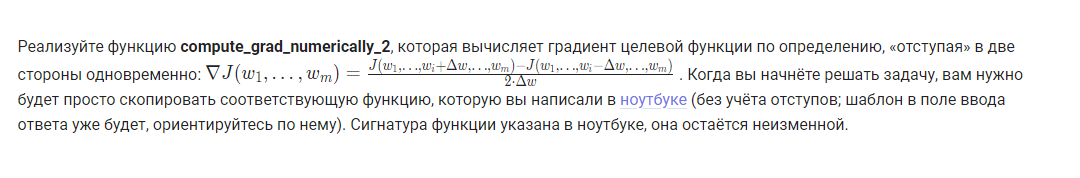

In [ ]:
import numpy as np

def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Численная производная целевой функции.
    neuron - объект класса Neuron с вертикальным вектором весов w,
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений,
    y - правильные ответы для тестовой выборки X,
    J - целевая функция, градиент которой мы хотим получить,
    eps - размер $\delta w$ (малого изменения весов).
    """
    # here goes your code
    w_0 = neuron.w.copy()
    
    weights = len(w_0)
    grad = np.zeros(w_0.shape)
    
    for i in range(weights):
        
        neuron.w = w_0.copy()
        neuron.w[i] += eps
        J_p = J(neuron, X, y)
        
        #neuron.w = w_0
        neuron.w[i] -= 2*eps
        J_m = J(neuron, X, y)
        #neuron.w = w_0
        grad[i] = (J_p - J_m) / (2 * eps)
    
    return grad

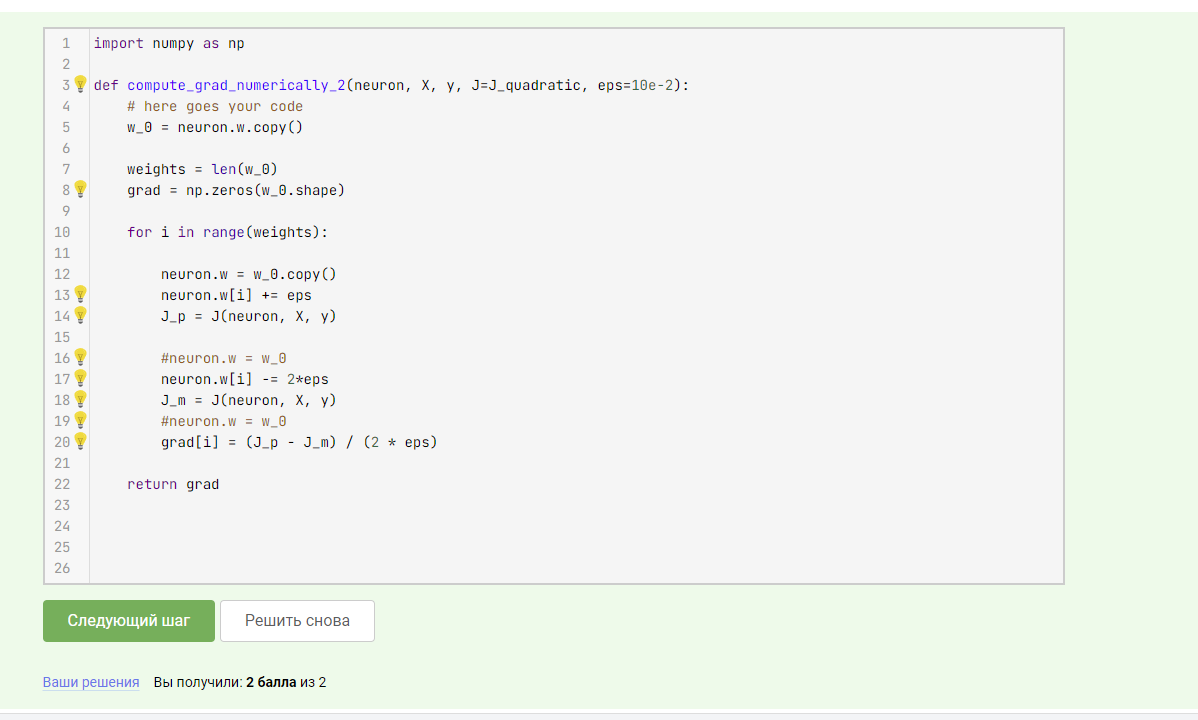

In [ ]:
import numpy as np

def compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=10e-2):

    initial_cost = J(neuron, X, y)
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] += eps
        
        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (J(neuron, X, y) - initial_cost)/eps
        
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    poz = compute_grad_numerically(neuron, X, y, eps=eps)
    neg = compute_grad_numerically(neuron, X, y, eps=-eps)
    return (poz + neg) / 2

In [ ]:
import numpy as np

def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    num_grad = np.zeros(neuron.w.shape)

    for i in range(neuron.w.shape[0]):
        old_wi = neuron.w[i].copy()

        # Считаем целевую функцию с положительным отклонением(шаг вверх)
        neuron.w[i] += eps
        J_plus = J(neuron, X, y)

        # Считаем целевую фунцию с отрицательным отклонением(шаг вниз)
        neuron.w[i] = old_wi - eps
        J_minus = J(neuron, X, y)

        num_grad[i] = (J_plus-J_minus)/(2*eps)

        neuron.w[i] = old_wi

    return num_grad 


In [ ]:
import numpy as np

def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        
        old_wi = neuron.w[i].copy()
        # Меняем вес в одну и другую сторону и считаем целевую функцию
        neuron.w[i] += eps
        J_plus_eps = J(neuron, X, y)
        neuron.w[i] -= 2 * eps
        J_minus_eps = J(neuron, X, y)
        # Вычисляем приближенное значение градиента
        num_grad[i] = (J_plus_eps - J_minus_eps)/(2 * eps)
        
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

In [ ]:
import numpy as np

def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    for i in range(len(w_0)):
        # Прежний вес
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] = old_wi + eps
        J_a = J(neuron, X, y)
        neuron.w[i] = old_wi - eps
        J_b = J(neuron, X, y)
        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (J_a - J_b) / (2 * eps)
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
    # Из compute_grad_numerically ^^
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad